In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from tqdm import tqdm
import os 
from HelperFunctions import *
tqdm.pandas()

## getting the data

In [5]:
landsat_training_data = pd.read_csv('../Datasets/landsat_features_training.csv')
terra_climate_training_data = pd.read_csv('../Datasets/terraclimate_features_training.csv')
explained_variables = pd.read_csv('../Datasets/water_quality_training_dataset.csv')

joined_explaining_vars = combine_two_datasets(landsat_training_data, terra_climate_training_data)
full_dataset = combine_two_datasets(joined_explaining_vars, explained_variables)


In [6]:
target_columns = ['Total Alkalinity', 'Electrical Conductance', 'Dissolved Reactive Phosphorus']
feature_columns = full_dataset.columns.drop(target_columns + ['Sample Date', 'Latitude', 'Longitude'])


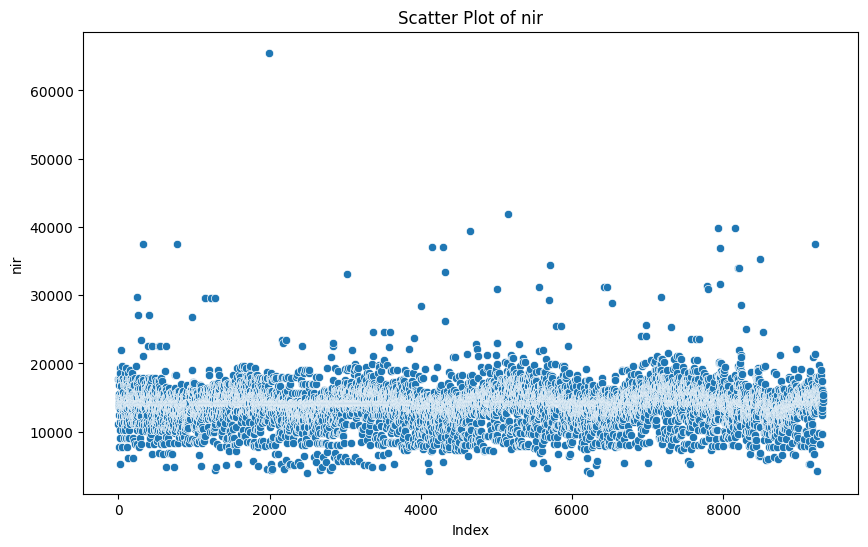

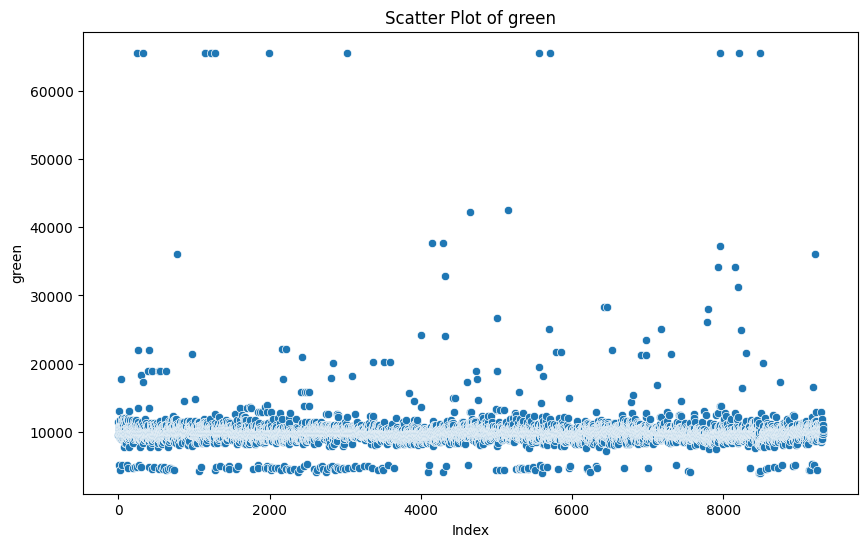

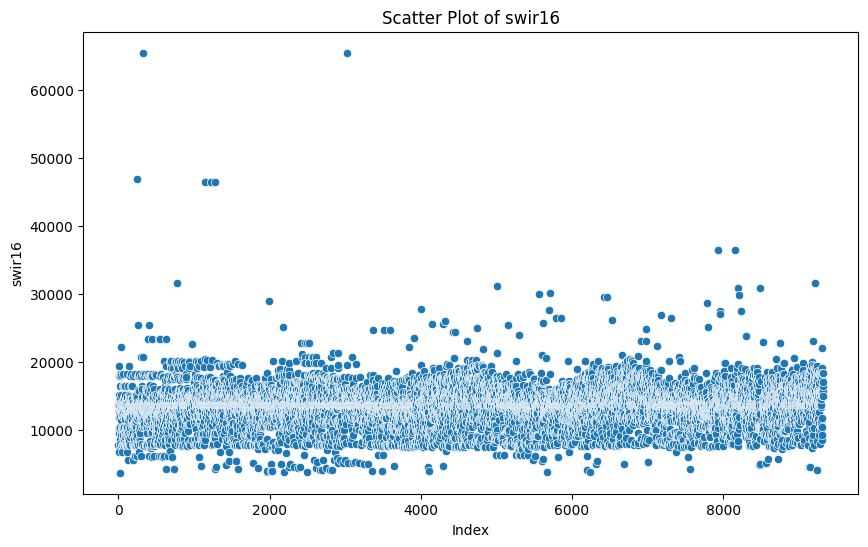

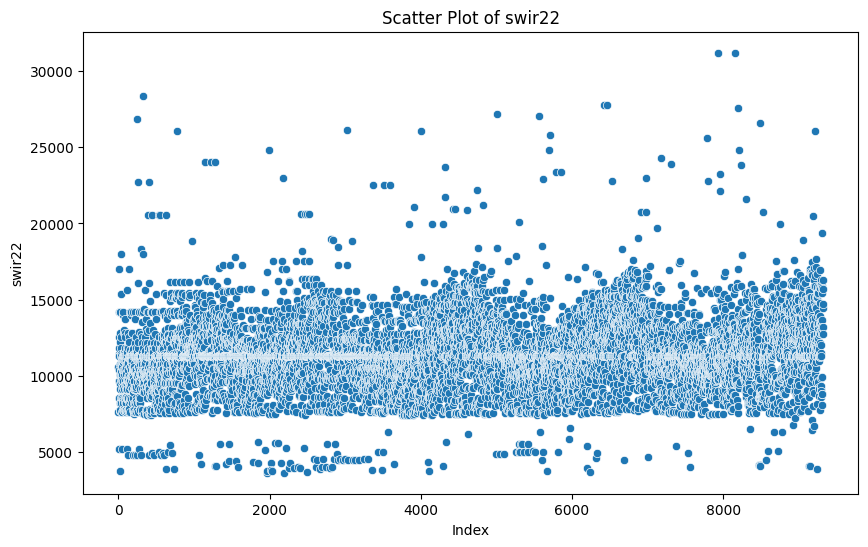

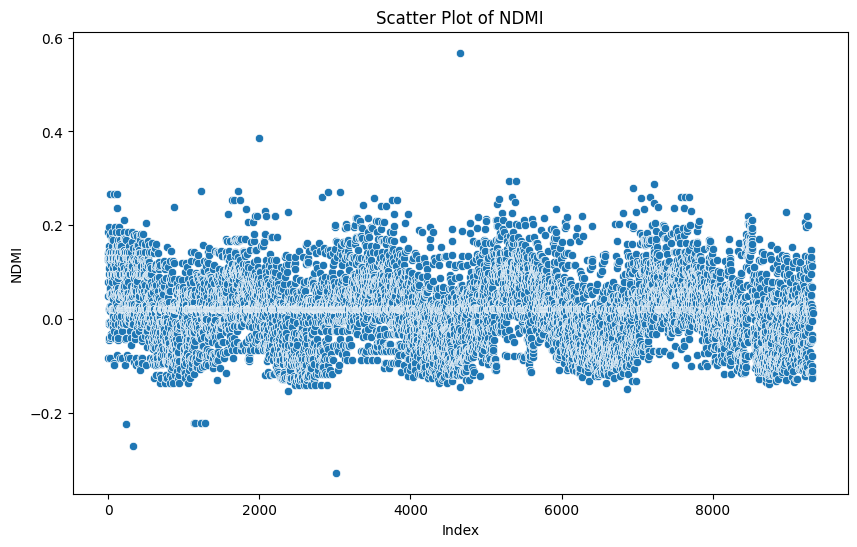

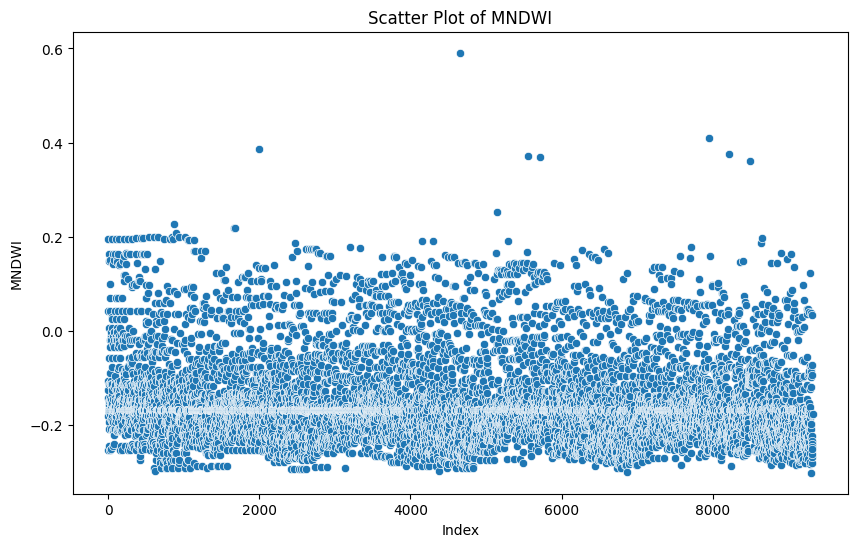

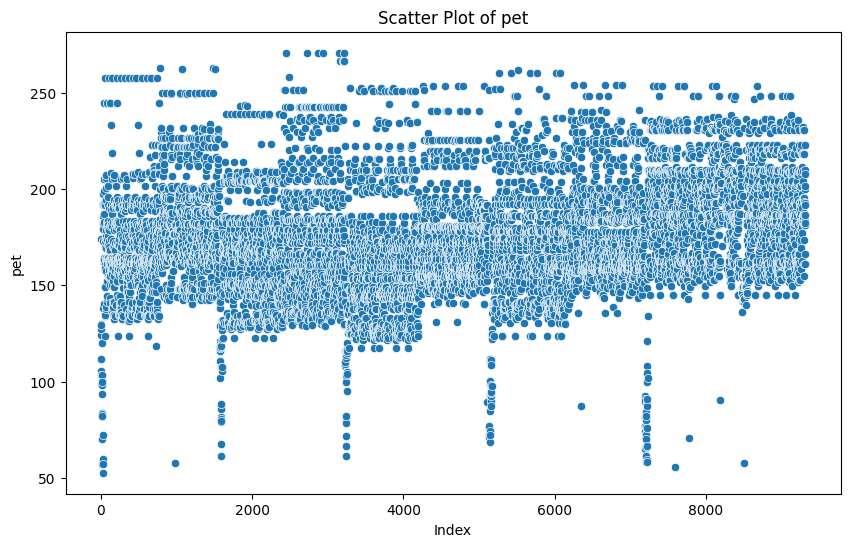

In [7]:
# plot a scatter plot of each feature of full dataset, agains its range values ( i want to see the distribution of values)
for col in feature_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=np.arange(len(full_dataset)), y=full_dataset[col])
    plt.title(f'Scatter Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()

## plotting against sample data

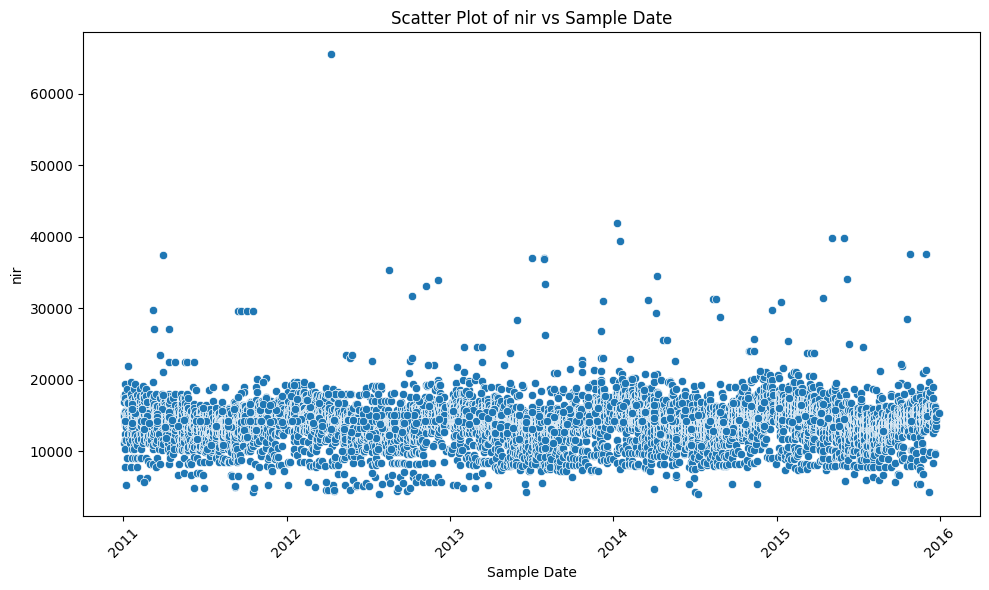

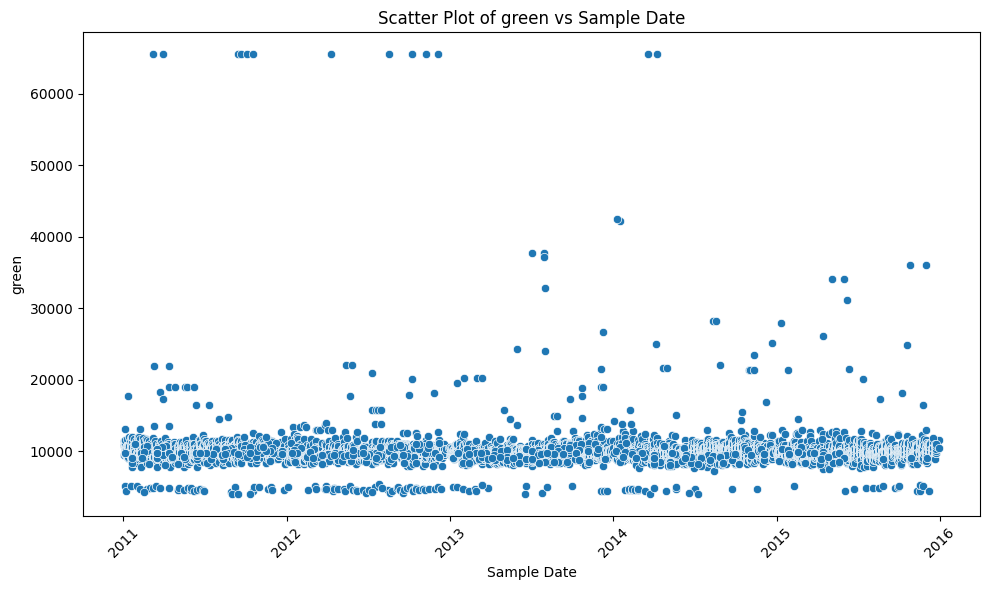

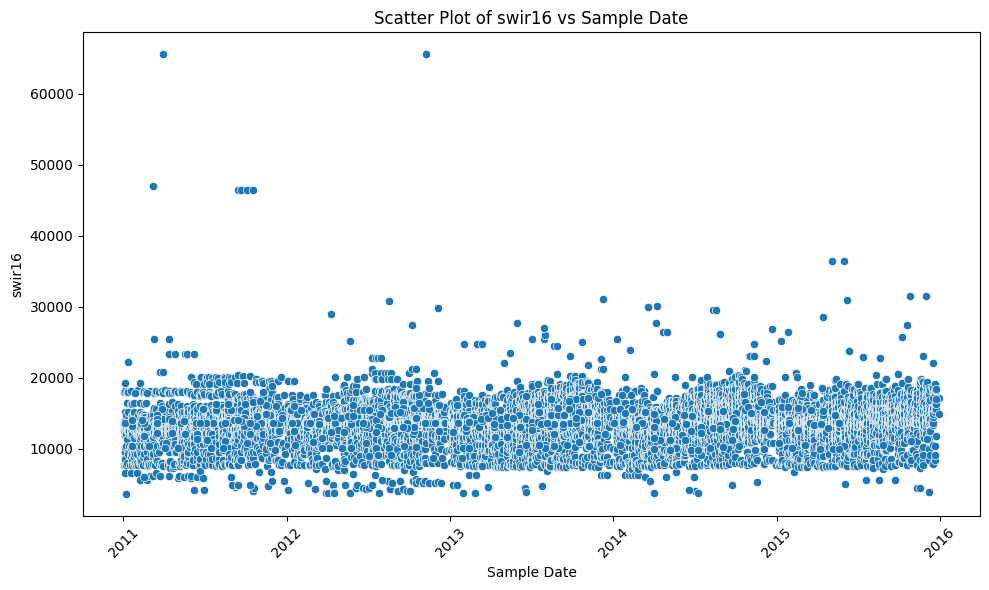

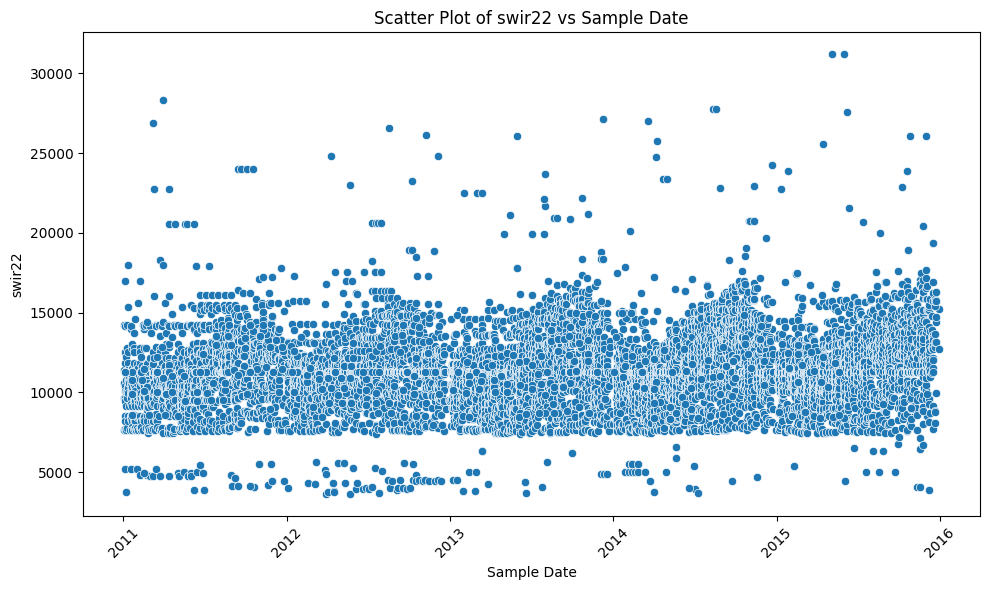

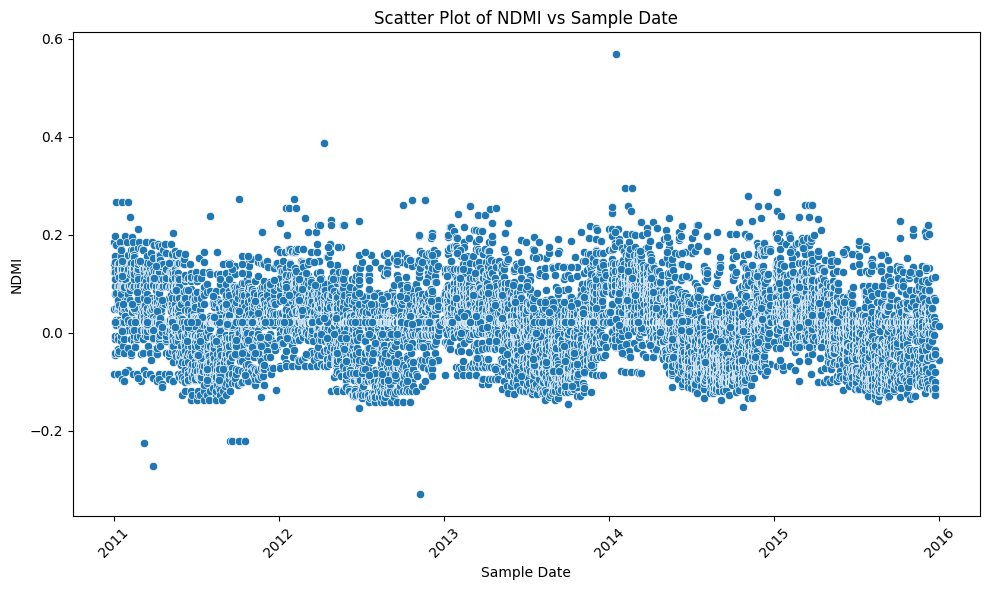

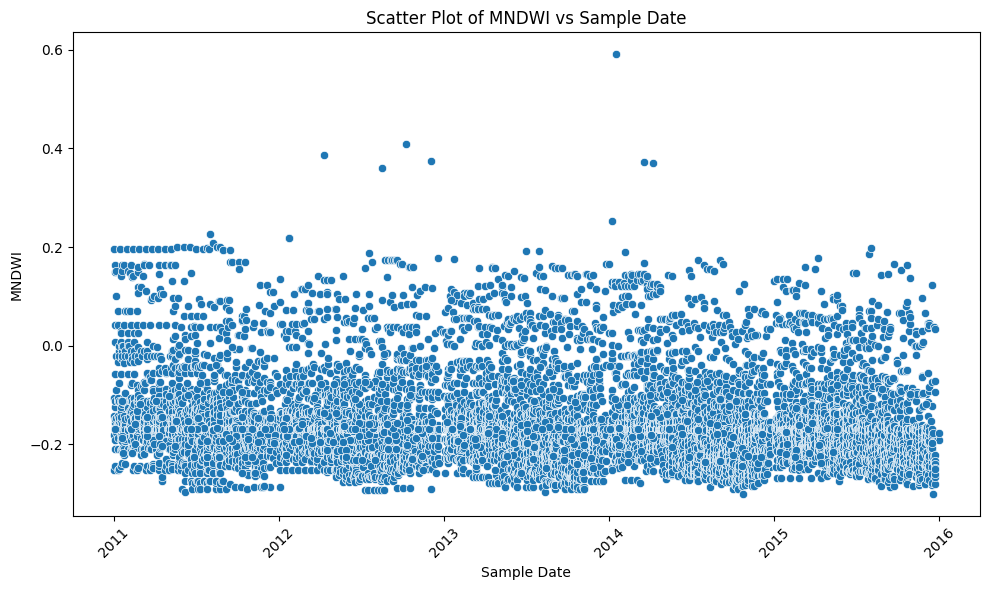

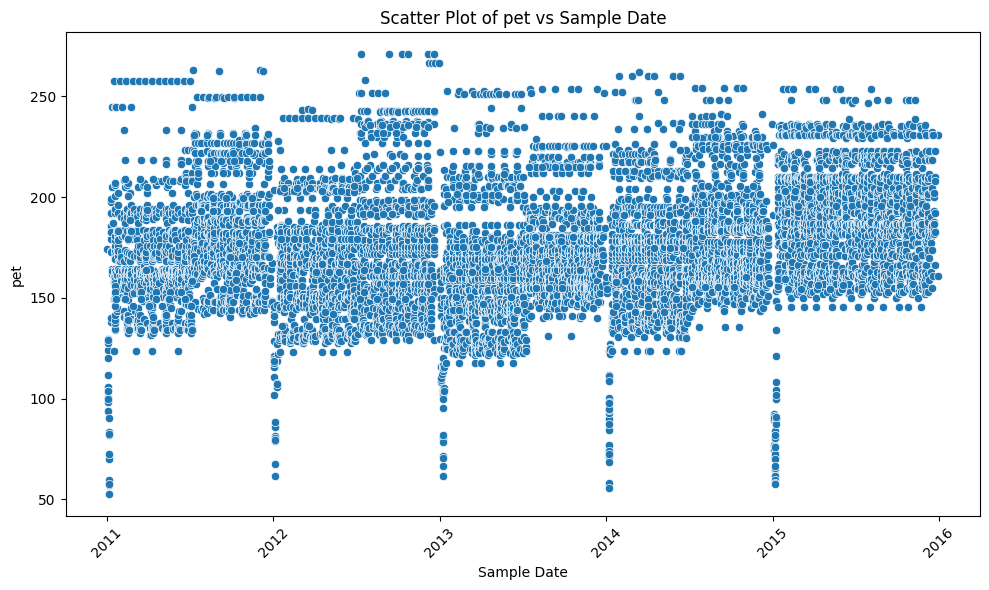

In [9]:
# Parse dates robustly (mixed formats, day-first)
date_series = pd.to_datetime(
    full_dataset['Sample Date'],
    format='mixed',  # handles multiple formats per element
    dayfirst=True,
    errors='coerce'  # invalid parses become NaT
)

# Notify about any invalid dates that will be skipped
num_na = date_series.isna().sum()
if num_na > 0:
  print(f"Warning: {num_na} rows have invalid dates and will be dropped for plotting.")

# Plot each feature against the parsed Sample Date, skipping NaNs
for col in feature_columns:
    plt.figure(figsize=(10, 6))
    y = full_dataset[col]
    mask = ~(date_series.isna() | y.isna())
    sns.scatterplot(x=date_series[mask], y=y[mask])
    plt.title(f'Scatter Plot of {col} vs Sample Date')
    plt.xlabel('Sample Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()